In [1]:
import pandas as pd

In [2]:
house = pd.read_csv('./Melbourne_housing_extra_data.csv')
house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.00,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.00,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,NaN,585.0,NaN,Whittlesea,-37.67681,145.00323,Southern Metropolitan,4380.0
19736,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,NaN,333.0,NaN,Darebin,-37.75884,145.00264,Northern Metropolitan,2940.0
19737,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,2.0,2.0,1999.0,199.0,140.00,Darebin,-37.75948,144.99615,Western Metropolitan,6543.0
19738,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,2.0,1.0,2011.0,238.0,118.00,Hume,-37.70322,144.88236,Western Metropolitan,6543.0


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [11]:
df = house[['Price','Bedroom2','Rooms','Car','Landsize']] #Columns we need
df.head()

,Price,Bedroom2,Rooms,Car,Landsize
0,NaN,2.0,2,1.0,126.0
1,1480000.0,2.0,2,1.0,202.0
2,1035000.0,2.0,2,0.0,156.0
3,NaN,3.0,3,1.0,0.0
4,1465000.0,3.0,3,0.0,134.0


In [16]:
#Checking for the missing values
df.isnull().sum()

Price       4344
Bedroom2    4413
Rooms          0
Car         4413
Landsize    4796
dtype: int64

Handling Missing values in Machine Learning

- If the data has more than 40% missing values, we would remove the missing values.
- If it is less than 40%, we can replace the missing values.

 When replacing the missing value, we can either replace them with the mean or median of
  the column
  
  
- If the skewness value is between -1 to 1, we would replace the missing values with
  mean
- Else you replace the missing values with median

In [19]:
df['Price'].skew()

2.3647135694133263

In [20]:
df['Bedroom2'].skew()

1.9744507249368086

In [23]:
df['Car'].skew()

2.3013065613368844

In [22]:
df['Landsize'].skew()

101.19472990366793

In [25]:
#Replace the missing values with the median for each column
df['Price'].median()

880000.0

In [34]:
df['Price'].fillna(df['Price'].median(),inplace=True)

In [35]:
df['Bedroom2'].median()

3.0

In [36]:
df['Bedroom2'].fillna(df['Bedroom2'].median(),inplace=True)

In [40]:
df['Car'].median()

2.0

In [81]:
df['Car'].fillna(df['Car'].median(),inplace=True)

/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [82]:
df['Landsize'].median()

420.0

In [83]:
df['Landsize'].fillna(df['Landsize'].median(),inplace=True)


In [84]:
df.isnull().sum()

Price       0
Bedroom2    0
Rooms       0
Car         0
Landsize    0
dtype: int64

In [85]:
#Identifying the input and output variable

y= df[['Price']]
x= df[['Bedroom2','Rooms','Car','Landsize']]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [88]:
len(x_train),len(x_test),len(y_train),len(y_test)

(14805, 4935, 14805, 4935)

## Building the model 

In [89]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
model = mlr.fit(x_train,y_train)

In [90]:
x_train.head()

,Bedroom2,Rooms,Car,Landsize
13544,2.0,2,2.0,705.0
10607,3.0,3,1.0,0.0
18738,3.0,3,1.0,1920.0
8018,2.0,2,1.0,0.0
8999,2.0,2,1.0,83.0


Price = m1*Bedroom2+m2*Rooms+m3*Car+m4*Landsize+c

In [91]:
model.coef_

array([[ 1.77058837e+04,  2.34097880e+05,  2.18644278e+04,
        -6.05449745e-01]])

In [93]:
model.intercept_

array([237337.74429214])

In [95]:
model.score(x_train,y_train) #R**2 value

0.18847136284246868

In [104]:
df_new = house[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']]
df_new.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,NaN
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,NaN
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0


In [105]:
df_new.dropna(inplace = True)

/Users/ssameer/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [106]:
df_new.shape

(6056, 9)

In [110]:
matrix = df_new.corr()
matrix

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Rooms,1.000000,0.534468,0.279446,0.841577,0.546363,0.372365,0.097034,0.197713,-0.019975
Price,0.534468,1.000000,-0.144326,0.483416,0.476125,0.248624,0.044973,0.131682,0.063181
Distance,0.279446,-0.144326,1.000000,0.242660,0.101189,0.238486,0.139192,0.146626,-0.195234
Bedroom2,0.841577,0.483416,0.242660,1.000000,0.617257,0.427213,0.095796,0.217746,-0.040766
Bathroom,0.546363,0.476125,0.101189,0.617257,1.000000,0.337490,0.067471,0.177177,0.014972
Car,0.372365,0.248624,0.238486,0.427213,0.337490,1.000000,0.121404,0.133110,-0.032239
Landsize,0.097034,0.044973,0.139192,0.095796,0.067471,0.121404,1.000000,0.158735,-0.360502
BuildingArea,0.197713,0.131682,0.146626,0.217746,0.177177,0.133110,0.158735,1.000000,-0.362132
YearBuilt,-0.019975,0.063181,-0.195234,-0.040766,0.014972,-0.032239,-0.360502,-0.362132,1.000000


<AxesSubplot:>

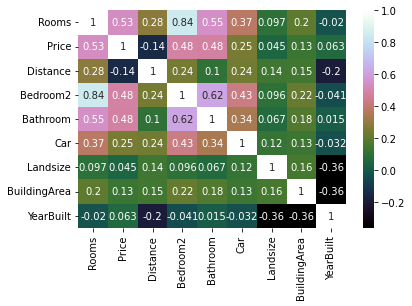

In [122]:
import seaborn as sns

sns.heatmap(matrix,cmap = 'cubehelix',annot= True)

Check for correlation between output variable and input variables

With Price -> Rooms, Bedroom and Bathroom are highly correlated

Rooms vs Bedroom2 = 0.84

Rooms vs Bathroom = 0.55

Bedroom2 vs Bathroom = 0.62

SO choose either rooms or bedroom

In [123]:
#Let us build the model using only Rooms and bathroom

In [130]:
df_final = df_new[['Price','Rooms','Bathroom']]

In [140]:
y = df_final[['Price']]
x = df_final[['Rooms','Bathroom']]

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [142]:
#Building the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
model = mlr.fit(x_train,y_train)

In [143]:
model.score(x_train,y_train)

0.3340627145322773